<a href="https://colab.research.google.com/github/microox/TBIR/blob/master/ISSonDL_C01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>International Summer School on Deep Learning, Gdansk, 5th-9th July, 2021, http://www.dl-lab.eu </h1>
<br>
<b>Introduction to Deep Convolutional Networks</b> 
<i>Jacek Ruminski</i>
<h2>C01.1: Multi-layer Perceptron (MLP)</h2>

The goal of this example is to show how simple classification works for CIFAR dataset (using TensorFlow).

You can make experiments with different layers, configurations, etc. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import keras
from keras.datasets import cifar10

# You can try to change your Google Colab environment to GPU 
print(tf.__version__)

2.5.0


170508288/170498071 [==============================] - 2s 0us/step
True original label : 6 frog


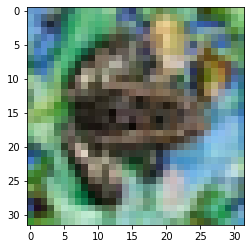

In [ ]:
# Load data and split to training and test datasets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = [
'airplane','automobile','bird', 'cat', 'deer' ,
'dog', 'frog', 'horse', 'ship', 'truck']

# Data properties
image_width = 32;
image_height = 32;
image_components = 3
n = image_width * image_height * image_components

# Show an example
example = 200
class_id = y_train[example].item()

plt.imshow(x_train[example])
print("True original label :", class_id, class_names[class_id])


In [ ]:
# Preprocess data - make the dataset flat for dense layers
x_train = x_train.reshape(50000, n)
x_test = x_test.reshape(10000, n)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize image data
m = np.mean(x_train, axis=0)
st_dev = np.std(x_train, axis=0)
x_train = (x_train - m) / st_dev
x_test = (x_test - m) / st_dev

# Set some training parameters
batch_size = 128
epochs = 10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50000, 100)        307300    
_________________________________________________________________
dense_1 (Dense)              (None, 50000, 50)         5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50000, 16)         816       
_________________________________________________________________
dense_3 (Dense)              (None, 50000, 10)         170       
Total params: 313,336
Trainable params: 313,336
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1563/1563 [==============================] - 22s 12ms/step - loss: 1.8012 - accuracy: 0.3597
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5779 - accuracy: 0.4420
Epoch 3/5
1563/1563 [=====================

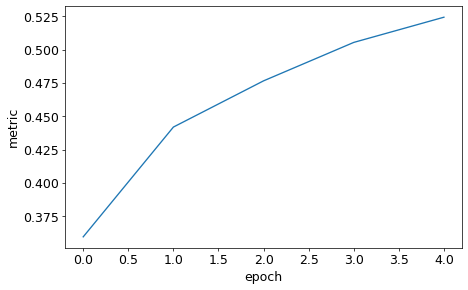

In [ ]:
# Use Keras High Level API to solve our problem

no_of_classes = 10

# 1. Define the Model
# You can make experiments with different number of layers and nodes 
keras_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100, activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(no_of_classes)
    
  ])

# Show the model definition (layers, etc.)
keras_model.summary()

# Set learning rate - eta
learning_rate = 0.05

# 2. Set the training parameters
keras_model.compile(
    # Use Eager mode
    run_eagerly=True,
    # Choose the optimizer
    optimizer='adam',
    # Choose the loss function ("softmax" is used)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Introduce additional metric
    metrics=['accuracy']
)

# 3. Start the training with the specified hyperparameters 
# (and store the history of training)
# Try with much more epochs in your experiments
history = keras_model.fit(x_train, y_train, epochs=5, batch_size=32)
  
# Show history
matplotlib.rcParams.update({'font.size': 14})
f = plt.figure(figsize=(8, 5), dpi=64)
f1 = f.add_subplot(111)
f1.set_xlabel('epoch')
f1.set_ylabel('metric')
plt.plot(history.history['accuracy'])

plt.show()


Run evaluation
1/1 [==============================] - 0s 18ms/step - loss: 1.0267 - accuracy: 0.6000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Evaluation result - loss:  1.026686191558838
Evaluation result - accuracy:  0.6000000238418579

Show some test results
True original label : 8 ship

Show scores: 
[5.692074  5.9624    2.0223477 2.810164  1.4187721 1.0234492 1.7338996
 2.5156493 7.400661  5.827871 ]

Show 'probabilities': 
[0.10937734 0.14332718 0.00278731 0.00612816 0.00152425 0.00102653
 0.00208888 0.00456482 0.60388935 0.1252862 ]

Label:  ship


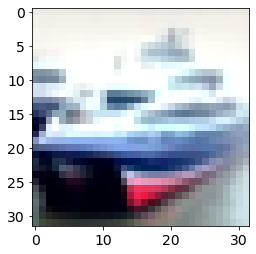

In [ ]:
# Test data - the same as for training data 

# test_examples = y_test.shape[0]
test_examples = 20

y = keras_model.predict(x_test[:test_examples])

print("\nRun evaluation")
loss, accuracy = keras_model.evaluate(x_test[:test_examples], 
                                      y_test[:test_examples])

print("Evaluation result - loss: ", loss)
print("Evaluation result - accuracy: ", accuracy)

# print("True (binary) labels: ")
# print(y_test[:test_examples])
# print("Model 'probabilities': ")
# print(y[:test_examples])

print("\nShow some test results")
example = 1
img = ((x_test[example]*st_dev[example]+m[example]).reshape(32,32,3)).astype(int)
plt.imshow(img)

class_id = y_test[example].item()
print("True original label :", class_id, class_names[class_id])
print("\nShow scores: ")
print(y[example])

probs = tf.nn.softmax(y[example]).numpy()
print("\nShow 'probabilities': ")
print(probs)

print("\nLabel: ", class_names[np.argmax(probs)])
